In [2]:
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')



daily_df = pd.read_csv('BTC-USD.csv')

daily_df['Date'] = pd.to_datetime(daily_df['Date'])

daily_df = daily_df.set_index('Date')
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

daily_df['variance'] = daily_df['log_ret'].rolling(180).var()

daily_df = daily_df['2018':'2022-01-31']
daily_df.dropna()

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance
Date,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420
...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139


In [3]:
intraday_5mindf = pd.read_csv('BTC-USDT-5min.csv')
intraday_5mindf.rename(columns={'date':'datetime'},inplace=True)

intraday_5mindf['datetime'] = pd.to_datetime(intraday_5mindf['datetime'],format='mixed')

In [4]:
intraday_5mindf.set_index('datetime', inplace=True)

# Resample the DataFrame to 5-minute intervals and aggregate OHLCV data
intraday_5min_df = intraday_5mindf.resample('5T').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Display the resampled DataFrame
intraday_5min_df.reset_index(inplace=True)

In [5]:
intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])

intraday_5min_df = intraday_5min_df.set_index('datetime')

intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df.index.date)

intraday_5min_df = intraday_5min_df['2018':'2022-01-31']

In [6]:
# Applying the method
warnings.filterwarnings('ignore')
check_nan = daily_df['log_ret'].isnull().values.any()
 
# printing the result
print(check_nan)
# Define the function to predict volatility
def predict_volatility(x):
    # Define the ARCH model
    model = arch_model(x, vol='garch', p=1, q=3)

    # Fit the ARCH model using the entire input series x
    fitted_model = model.fit(disp='off')

    # Forecast the variance for the next period
    variance_forecast = fitted_model.forecast(horizon=1).variance.iloc[-1, 0]
    return variance_forecast

# Apply the predict_volatility function to each rolling window
window_size = 180
predictions = daily_df['log_ret'].rolling(window=window_size).apply(predict_volatility)

# Append the predictions to the DataFrame
daily_df['predictions'] = predictions
daily_df

False


C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Vishal\Miniconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420,NaN
...,...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148,0.001141
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140,0.001134
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139,0.000981


In [7]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420,NaN
...,...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148,0.001141
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140,0.001134
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139,0.000981


In [8]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
                                         else (-1 if (x['prediction_premium']<x['premium_std']*-1) else np.nan),
                                         axis=1)

daily_df['signal_daily'] = daily_df['signal_daily'].shift()

daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341,NaN,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380,NaN,NaN,NaN,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369,NaN,NaN,NaN,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369,NaN,NaN,NaN,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148,0.001141,-0.005901,0.134882,NaN
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140,0.001134,-0.005864,0.134953,NaN
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139,0.000981,-0.138164,0.134787,NaN


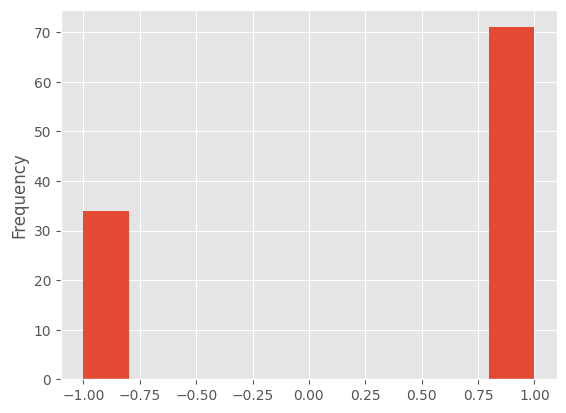

In [9]:
plt.style.use('ggplot')

daily_df['signal_daily'].plot(kind='hist')

plt.show()

In [13]:
final_df = intraday_5min_df.reset_index()\
                            .merge(daily_df[['signal_daily']].reset_index(),
                                   left_on='date',
                                   right_on='Date')\
                            .drop(['date','Date'], axis=1)\
                            .set_index('datetime')

final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
                                length=14)

final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,0]

final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,2]

final_df['signal_intraday'] = final_df.apply(lambda x: -1 if (x['rsi']>70)&
                                                            (x['close']>x['uband'])
                                             else (1 if (x['rsi']<30)&
                                                         (x['close']<x['lband']) else np.nan),
                                             axis=1)

final_df['return'] = np.log(final_df['close']).diff()

final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return
datetime,,,,,,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13576.28,13600.00,33.617798,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,13600.00,13600.00,13501.01,13554.58,40.528679,NaN,NaN,NaN,NaN,NaN,-0.003345
2018-01-01 00:10:00,13554.58,13569.97,13400.01,13556.15,49.469536,NaN,NaN,NaN,NaN,NaN,0.000116
2018-01-01 00:15:00,13533.75,13547.73,13402.00,13430.52,32.725614,NaN,NaN,NaN,NaN,NaN,-0.009311
2018-01-01 00:20:00,13440.01,13459.99,13410.44,13439.94,26.614135,NaN,NaN,NaN,NaN,NaN,0.000701
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 23:35:00,38432.16,38467.26,38427.22,38436.00,38.932290,NaN,48.269732,38354.531537,38604.043463,NaN,0.000100
2022-01-31 23:40:00,38436.00,38445.65,38368.77,38369.11,33.567980,NaN,42.935056,38341.298997,38608.328003,NaN,-0.001742
2022-01-31 23:45:00,38369.12,38382.24,38336.04,38379.47,69.826680,NaN,43.967943,38332.460320,38610.935680,NaN,0.000270


In [11]:
final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1)
                                        else (1 if (x['signal_daily']==1)&(x['signal_intraday']==1) else np.nan),
                                        axis=1)

final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
                                  .transform(lambda x: x.ffill())

final_df['forward_return'] = final_df['return'].shift(-1)

final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()
daily_return_df

datetime
2018-01-01    0.000000
2018-01-02    0.000000
2018-01-03    0.000000
2018-01-04    0.000000
2018-01-05    0.000000
                ...   
2022-01-27    0.000000
2022-01-28    0.000000
2022-01-29    0.000000
2022-01-30    0.011055
2022-01-31    0.000000
Freq: D, Name: strategy_return, Length: 1492, dtype: float64

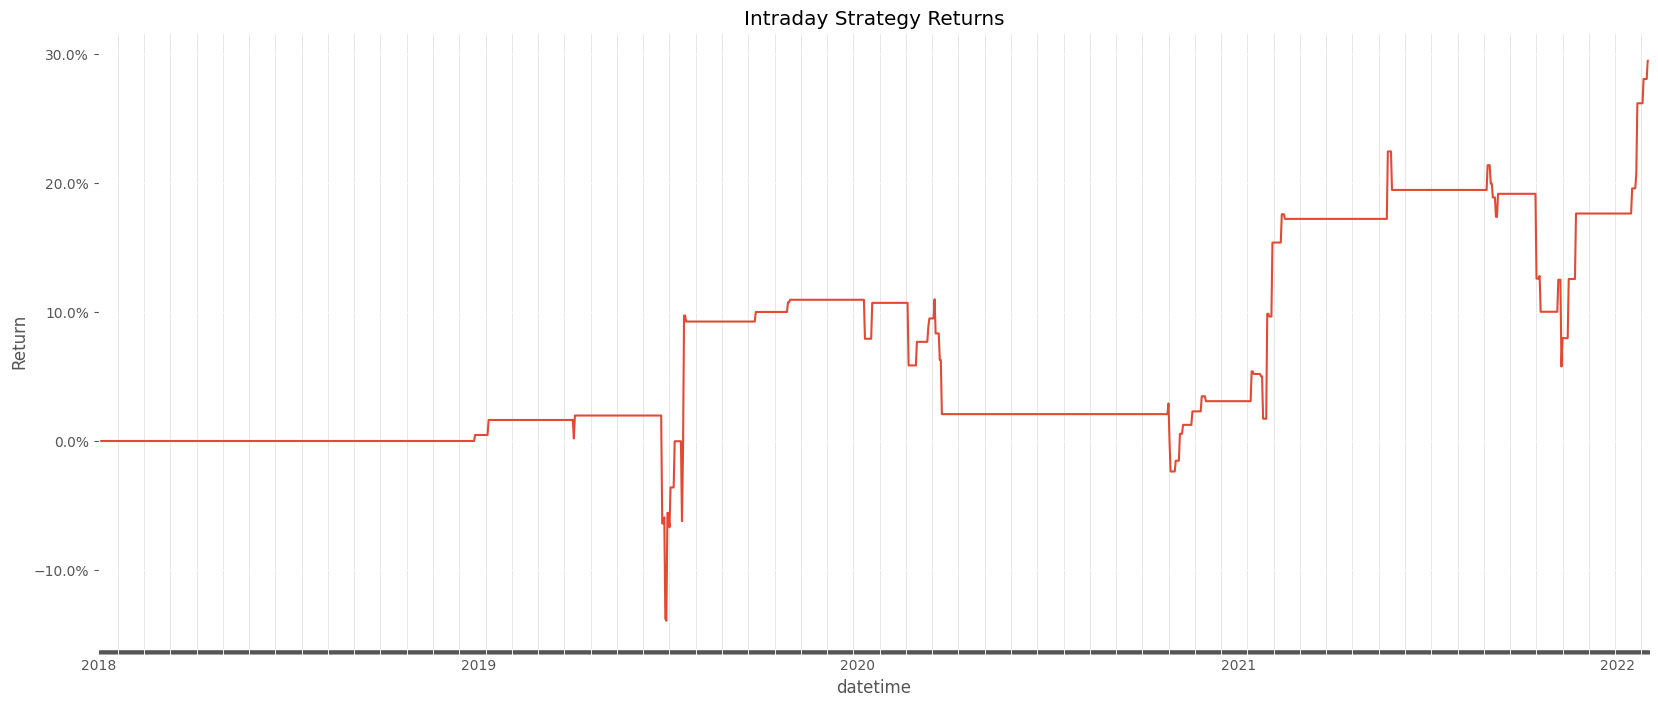

In [12]:
import matplotlib.ticker as mtick

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(20,8))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.xticks(daily_return_df.index)

plt.show()
#BTC returned 176.20% between 2018-01-01 and 2022-01-31

# GOLDEN CROSS STRATEGY:

In [15]:
# Store the data as a panda dataframe
btc = pd.read_csv('BTC-USD.csv')
btc['Date'] = pd.to_datetime(btc['Date']) 
btc = btc.set_index('Date')
btc['log_ret'] = np.log(btc['Adj Close']).diff()
btc['variance'] = btc['log_ret'].rolling(180).var()
btc = btc['2018':'2022-01-31']

max_adj_close = btc['Adj Close'].max()
min_adj_close = btc['Adj Close'].min()

print(btc) # Truncated the data until 30th Dec 2011 for better visibility
print("Max Adj. Close Price = ", max_adj_close)
print("Min Adj. Close Price = ", min_adj_close)

                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                  ...           ...           ...           ...   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445313  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601563   
2022-01-31  37920.281250  38647.261719  36733.574219  38483.125000   

               Adj Close       Volume   log_ret  variance  
Date                         

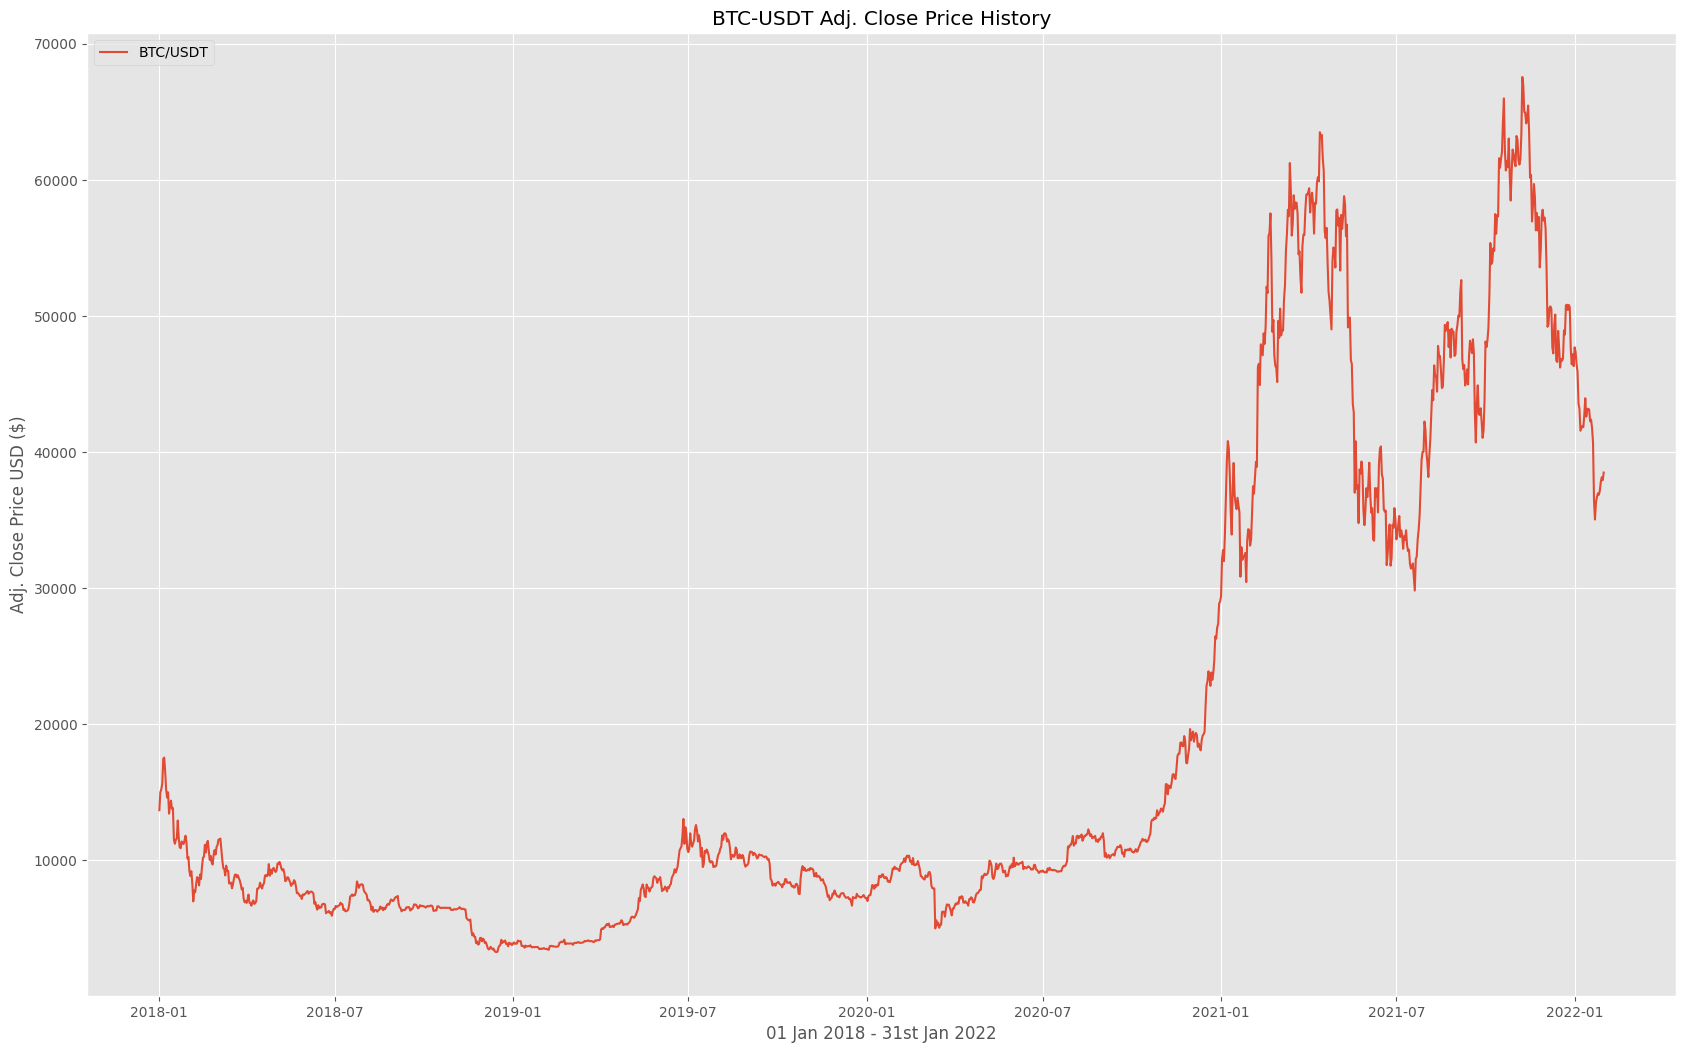

In [16]:
plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(btc['Adj Close'], label = 'BTC/USDT') # adjusted price on the x axis
plt.title('BTC-USDT Adj. Close Price History')
plt.xlabel('01 Jan 2018 - 31st Jan 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [17]:
# Setup Moving Average Windows
Window_lower = 30 # short-term
Window_upper = 100 # long-term

# Short term moving average
SMA_short = pd.DataFrame() # simple moving average
SMA_short['Adj Close']= btc['Adj Close'].rolling(window = Window_lower).mean()

# Long term moving average
SMA_long = pd.DataFrame() # simple moving average
SMA_long['Adj Close']= btc['Adj Close'].rolling(window = Window_upper).mean()


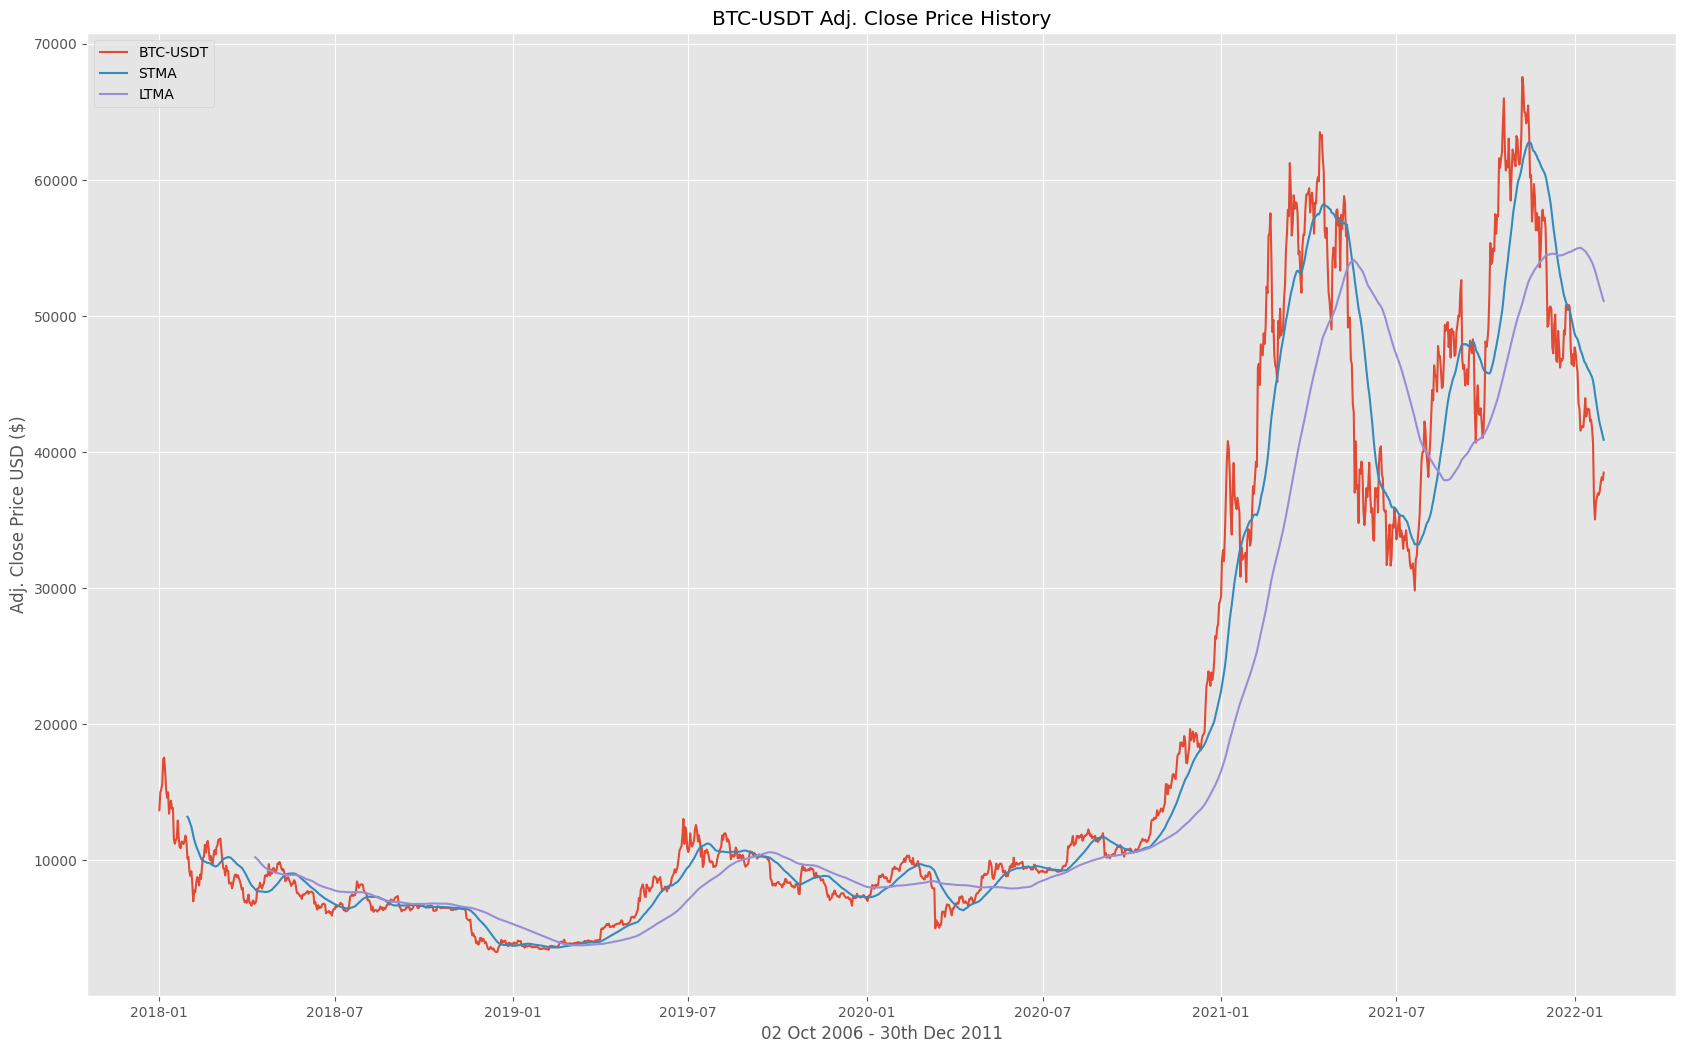

In [18]:
# Plot the short and long term moving averages with the raw data
plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(btc['Adj Close'], label = 'BTC-USDT') # adjusted price on the x axis
plt.plot(SMA_short['Adj Close'], label = 'STMA') # short term moving avg
plt.plot(SMA_long['Adj Close'], label = 'LTMA') # long term moving avg
plt.title('BTC-USDT Adj. Close Price History')
plt.xlabel('02 Oct 2006 - 30th Dec 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [19]:
btc['ATR'] = ATR = pd.concat([btc.High.sub(btc.Low), btc.High.sub(btc.Close.shift()).abs(), btc.Low.sub(btc.Close.shift()).abs()], axis=1).max(1).ewm(span=14).mean()
btc


,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,ATR
Date,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035900,0.003341,957.500000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.092589,0.003380,1666.517857
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014505,0.003369,1308.115375
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.025858,0.003369,1280.393576
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,0.110945,0.003420,1599.213029
...,...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,0.007734,0.001148,2180.488645
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,0.017248,0.001140,2121.992763
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009321,0.001139,1995.032270


In [20]:
# Create dataset to store short and long term moving avg
moving_avg = pd.DataFrame()
moving_avg['BTC']= btc['Adj Close']
moving_avg['STMA']= SMA_short['Adj Close']
moving_avg['LTMA']= SMA_long['Adj Close']
moving_avg['ATR']=btc['ATR']

In [21]:
# Create Buy vs Sell signals

def investment_signal(data):
    
    sigPriceToBuy = []
    sigPriceToSell = []
    isCross = -1 # flag to check when STMA crosses over LTMA
    for i in range(len(data)):
        
        if data['STMA'][i]> data['LTMA'][i]:
            
            if isCross !=1:
                
                sigPriceToBuy.append(data['BTC'][i]) # good time to buy
                sigPriceToSell.append(np.nan)
                isCross = 1
            else:
                sigPriceToBuy.append(np.nan)
                sigPriceToSell.append(np.nan)
        elif data['STMA'][i]< data['LTMA'][i]:
            if isCross!= 0:
                sigPriceToBuy.append(np.nan) 
                sigPriceToSell.append(data['BTC'][i]) # good time to sell
                isCross = 0
            else:
                sigPriceToBuy.append(np.nan)
                sigPriceToSell.append(np.nan)
        else:
            sigPriceToBuy.append(np.nan)
            sigPriceToSell.append(np.nan)

    return (sigPriceToBuy,sigPriceToSell)

In [85]:
def investment_signal(data):
    sigPriceToBuy = []
    sigPriceToSell = []
    isCross = -1  # flag to check when STMA crosses over LTMA
    for i in range(len(data)):
        if data['STMA'][i] > data['LTMA'][i]:
            if isCross != 1:
                buy_price = data['BTC'][i]  # Buying price at the time of purchase
                target_price = buy_price + (data['ATR'][i] * 2)  # Set target at 2x ATR over the buying price
                stoploss_price = buy_price - data['ATR'][i]  # Set stop-loss at 1x ATR below the buying price
                sigPriceToBuy.append(target_price)
                sigPriceToSell.append(stoploss_price)
                isCross = 1
            else:
                sigPriceToBuy.append(np.nan)
                sigPriceToSell.append(np.nan)
        elif data['STMA'][i] < data['LTMA'][i]:
            if isCross != 0:
                sell_price = data['BTC'][i]  # Selling price at the time of sale
                target_price = sell_price - (data['ATR'][i] * 2)  # Set target at 2x ATR under the selling price
                sigPriceToBuy.append(np.nan)
                sigPriceToSell.append(target_price)
                isCross = 0
            else:
                sigPriceToBuy.append(np.nan)
                sigPriceToSell.append(np.nan)
        else:
            sigPriceToBuy.append(np.nan)
            sigPriceToSell.append(np.nan)

    return sigPriceToBuy, sigPriceToSell


In [22]:
# Store the Buy and Sell data
buy_sell = investment_signal(moving_avg)
moving_avg['Buy_Signal_Price'] = buy_sell[0]
moving_avg['Sell_Signal_Price'] = buy_sell[1]
moving_avg.dropna()

,BTC,STMA,LTMA,ATR,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,


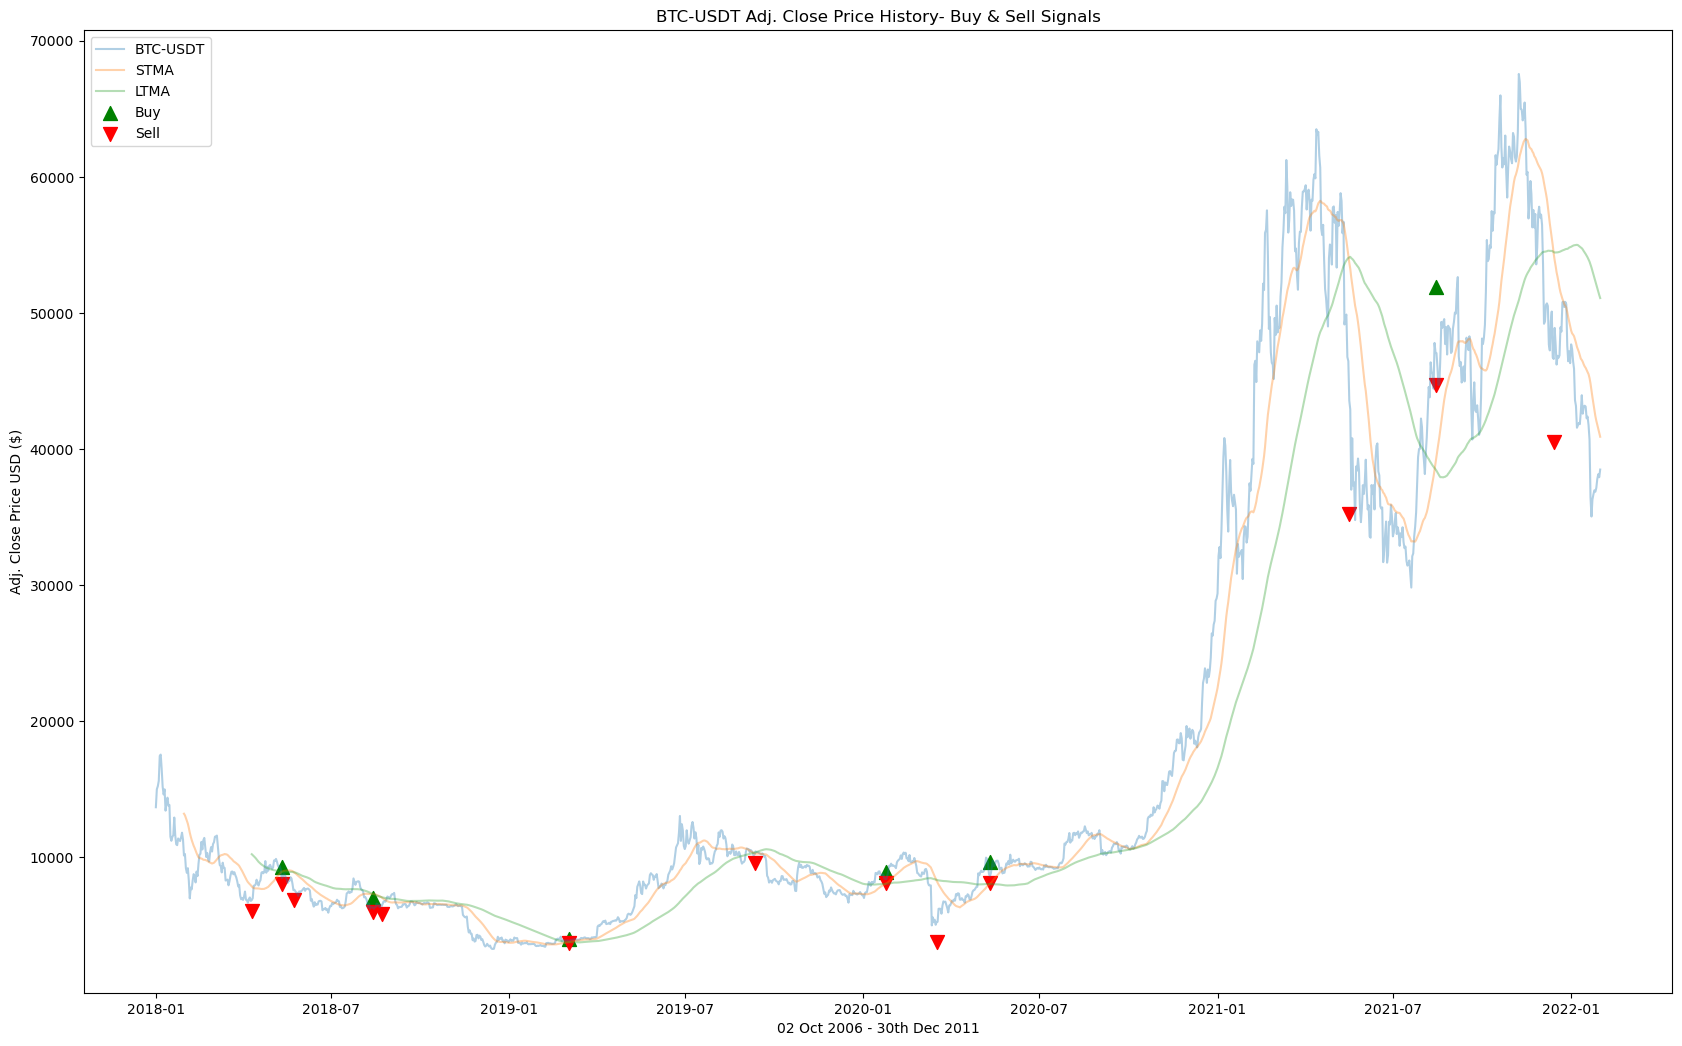

In [88]:
# Plot the data with buy and signal markers
plt.figure(figsize=(20.5,12.5)) # sizes are in inches
plt.plot(btc['Adj Close'], label = 'BTC-USDT',alpha= 0.35) # adjusted price on the x axis
plt.plot(SMA_short['Adj Close'], label = 'STMA',alpha= 0.35) # short term moving avg
plt.plot(SMA_long['Adj Close'], label = 'LTMA',alpha= 0.35) # long term moving avg

# Buy Signal
plt.scatter(moving_avg.index, moving_avg['Buy_Signal_Price'], label = 'Buy', marker = "^", color="green",s=100) # Decision Made to buy

# Sell Signal
plt.scatter(moving_avg.index,moving_avg['Sell_Signal_Price'], label = 'Sell',  marker = "v", color="red",s=100) # long term moving avg


plt.title('BTC-USDT Adj. Close Price History- Buy & Sell Signals')
plt.xlabel('02 Oct 2006 - 30th Dec 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [23]:

# Calculate Profit and Losses
def PnL(data):
    loss = 0
    profit = 0
    print(data)
    spent=0
    gained=0
    for i in range(len(data)):
        if str(data['Buy_Signal_Price'][i])!=str(np.NAN):
            spent+=data['Buy_Signal_Price'][i]
        if str(data['Sell_Signal_Price'][i])!=str(np.NAN):
            gained+=data['Sell_Signal_Price'][i]
    for i in range(0,len(data)-1,2):
        if (data['Buy_Signal_Price'][i+1] - data['Sell_Signal_Price'][i] >=0):
            print("1")
            # we made a loss
            loss = loss + data['Buy_Signal_Price'][i+1] - data['Sell_Signal_Price'][i]
        else:
            print("2")
            # we made profit
            profit = profit + data['Buy_Signal_Price'][i+1] - data['Sell_Signal_Price'][i]

    return (profit, loss,spent,gained)

In [24]:
PnL(moving_avg.dropna(subset=['Buy_Signal_Price', 'Sell_Signal_Price'],how='all'))

                     BTC          STMA          LTMA          ATR  \
Date                                                                
2018-04-10   6834.759766   7831.582633  10203.514722   400.354830   
2018-05-11   8441.490234   8918.155013   8892.121416   418.146317   
2018-05-24   7587.339844   8846.327653   8876.855200   382.017705   
2018-08-13   6297.569824   7288.809977   7280.727388   330.333953   
2018-08-22   6376.709961   7034.287614   7045.812974   301.990893   
2019-03-04   3761.557129   3741.904297   3734.198325    95.165875   
2019-09-11  10178.372070  10258.501465  10314.906099   326.037476   
2020-01-25   8367.847656   8051.443962   8020.980356   260.677575   
2020-03-17   5225.629395   8250.787500   8310.350093   737.604862   
2020-05-11   8601.795898   8027.151367   8003.155137   515.740005   
2021-05-17  43537.511719  53689.561589  54081.456719  4157.912102   
2021-08-14  47096.945313  38987.168294  38500.571524  2413.490625   
2021-12-14  46612.632813  54360.82

(-5715.447265999999, 8542.330564999997, 82567.20605400001, 126352.955568)